In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/homework 3'    #project folder directory

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%cd 'gdrive/My Drive/homework 3'

/content/gdrive/My Drive/homework 3


In [0]:
import numpy as np
import cv2 as cv
import glob
import os
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

import sklearn as sk

%load_ext autoreload
%autoreload 2

In [0]:
print(cv.__version__)

4.1.2


In [0]:
all_split = np.arange(1178, dtype=np.int)
training_split = np.loadtxt('dataset/real/training_split.txt', delimiter=',', dtype=np.int)
testing_split = np.setdiff1d(all_split, training_split)

In [0]:
path1 = "dataset/coarse"
path2 = "dataset/fine"
path3 = "dataset/real"

classes = [c for c in os.listdir(path1)]
classes.sort()

In [5]:
classes

['ape', 'benchvise', 'cam', 'cat', 'duck']

In [0]:
coarse_pose_files = []
fine_pose_files = []
real_pose_files = []

coarse_pose = []
fine_pose = []
real_pose = []

for class_ in classes:
    coarse_pose_files.append(os.path.join(path1, class_, "poses.txt"))
    fine_pose_files.append(os.path.join(path2, class_, "poses.txt"))
    real_pose_files.append(os.path.join(path3, class_, "poses.txt"))

for file_ in coarse_pose_files:
    coarse_pose.append(np.loadtxt(file_))

for file_ in fine_pose_files:
    fine_pose.append(np.loadtxt(file_))
    
for file_ in real_pose_files:
    real_pose.append(np.loadtxt(file_))
    
coarse_pose = np.array(coarse_pose)
fine_pose = np.array(fine_pose)
real_pose = np.array(real_pose)

In [0]:
coarse_pose[0,0,:]

array([-0.21679692, -0.58559097,  0.76315701, -0.16635413])

In [0]:
train_data = []
test_data = []
database_data = []

train_class = []
test_class = []
database_class = []

#Real images
for class_ in classes:
  for train_index in training_split:
    file = os.path.join(path3, class_, "real" + str(train_index) + ".png")
    image = np.array(cv.imread(file), dtype=np.float)  
    cv.normalize(image,image,0.0,1.0,cv.NORM_MINMAX)
    train_data.append(image)
    train_class.append(class_)

  for test_index in testing_split:
    file = os.path.join(path3, class_, "real" + str(test_index) + ".png")
    image = np.array(cv.imread(file), dtype=np.float)  
    cv.normalize(image,image,0.0,1.0,cv.NORM_MINMAX)
    test_data.append(image)
    test_class.append(class_)

#Fine sampled images
for class_ in classes:
  for index in range(fine_pose.shape[1]):
    file = os.path.join(path2, class_, "fine" + str(index) + ".png")
    image = np.array(cv.imread(file), dtype=np.float)  
    cv.normalize(image,image,0.0,1.0,cv.NORM_MINMAX)
    train_data.append(image)
    train_class.append(class_)

#Coarse sampled images
for class_ in classes:
  for index in range(coarse_pose.shape[1]):
    file = os.path.join(path1, class_, "coarse" + str(index) + ".png")
    image = np.array(cv.imread(file), dtype=np.float)  
    cv.normalize(image,image,0.0,1.0,cv.NORM_MINMAX)
    database_data.append(image)
    database_class.append(class_)

train_data = np.array(train_data)
test_data = np.array(test_data)
database_data = np.array(database_data)

train_class = np.array(train_class)
test_class = np.array(test_class)
database_class = np.array(database_class)

In [0]:
# Labels
train_labels = real_pose[:, training_split, :]
test_labels = real_pose[:, testing_split, :]

train_labels = train_labels.reshape((-1, train_labels.shape[2]))
fine_pose = fine_pose.reshape((-1, fine_pose.shape[2]))
test_labels = test_labels.reshape((-1, test_labels.shape[2]))
database_labels = coarse_pose.reshape((-1, coarse_pose.shape[2]))

train_labels = np.vstack((train_labels, fine_pose))


In [0]:
print(train_data.shape, train_labels.shape, train_class.shape)
print(test_data.shape, test_labels.shape, test_class.shape)
print(database_data.shape, database_labels.shape, database_class.shape)

(7410, 64, 64, 3) (7410, 4) (7410,)
(3535, 64, 64, 3) (3535, 4) (3535,)
(1335, 64, 64, 3) (1335, 4) (1335,)


In [0]:
np.save('./train_data.npy', train_data)
np.save('./train_labels.npy', train_labels)
np.save('./train_class.npy', train_class)
np.save('./test_data.npy', test_data)
np.save('./test_labels.npy', test_labels)
np.save('./test_class.npy', test_class)
np.save('./database_data.npy', database_data)
np.save('./database_labels.npy', database_labels)
np.save('./database_class.npy', database_class)

In [0]:
train_data = np.load('./train_data.npy')
train_labels = np.load('./train_labels.npy')
train_class = np.load('./train_class.npy')
test_data = np.load('./test_data.npy')
test_labels = np.load('./test_labels.npy')
test_class = np.load('./test_class.npy')
database_data = np.load('./database_data.npy')
database_labels = np.load('./database_labels.npy')
database_class = np.load('./database_class.npy')

In [0]:
from helper_func import quaternion_angle_metric, batch_generator

In [0]:
batch = batch_generator(train_data,train_labels,train_class,database_data,database_labels,database_class)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

/content/gdrive/My Drive/homework 3/helper_func.py:4: RuntimeWarning: invalid value encountered in arccos
  angle = 2 * np.arccos(np.abs(np.dot(q_anchor,q_puller)))


2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557


In [0]:
np.save('./batch.npy', batch)

In [0]:
dataset = np.load('./batch.npy')

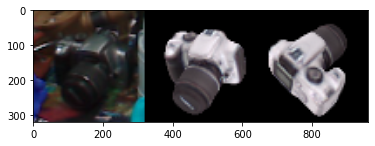

In [9]:
from matplotlib.pyplot import imshow
triplet =1000
#for triplet in range(dataset.shape[0]):
disp = cv.resize(np.concatenate((dataset[triplet, 0], dataset[triplet, 1], dataset[triplet, 2]), axis=1), (0,0), fx=5, fy=5)
imshow(disp)
 # break 

In [0]:
def train_net(n_epochs):

    model.train()
    acc_loss = 0.0
    for epoch in range(n_epochs):
        for batch_i, data in enumerate(triplet_loader):
            anchor = data[:,0]                         # (N,H,W,C)    N is batch size 
            puller = data[:,1]
            pusher = data[:,2]
            anchor = anchor.permute(0, 3, 1, 2).double()    # Format for pytorch is (N,C,H,W)
            puller = puller.permute(0, 3, 1, 2).double()
            pusher = pusher.permute(0, 3, 1, 2).double()
            
            d_anc, d_pul, d_pus = model(anchor, puller, pusher)
            loss = criterion(d_anc, d_pul, d_pus)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            acc_loss += loss.item()

            if batch_i % 20 == 19:
                print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch+1,batch_i+1,acc_loss/(len(triplet_loader)*epoch+batch_i)))

    torchsave(model, "descriptor.model")
    print('finish')

            
            


In [11]:
import torchvision
from torch.utils.data import DataLoader
from network import net
from tripletLoss import loss_maker
import torch.optim as optim
#from torch import nn
from torch import save as torchsave

batch_size = 128
triplet_loader = DataLoader(dataset,batch_size=batch_size,shuffle=True,num_workers=3)
margin = 0.01

model = net()
model = model.double()
criterion = loss_maker(margin)
optimizer = optim.Adam(model.parameters(), lr=5e-4, betas=(0.9,0.999), eps=1e-8, weight_decay=0.0005)
train_net(n_epochs=100)


Epoch: 1, Batch: 20, Loss: 0.14163590249301156
Epoch: 1, Batch: 40, Loss: 0.09509117057616918
Epoch: 2, Batch: 20, Loss: 0.06576198049310902
Epoch: 2, Batch: 40, Loss: 0.057764190185172884
Epoch: 3, Batch: 20, Loss: 0.04784393423678834
Epoch: 3, Batch: 40, Loss: 0.04459718169938473
Epoch: 4, Batch: 20, Loss: 0.03935465341132907
Epoch: 4, Batch: 40, Loss: 0.03720732817589734
Epoch: 5, Batch: 20, Loss: 0.03366769798990038
Epoch: 5, Batch: 40, Loss: 0.032249179274042555
Epoch: 6, Batch: 20, Loss: 0.02982058717577493
Epoch: 6, Batch: 40, Loss: 0.02873036049175977
Epoch: 7, Batch: 20, Loss: 0.02703279661689616
Epoch: 7, Batch: 40, Loss: 0.026237871432736353
Epoch: 8, Batch: 20, Loss: 0.024931519884069994
Epoch: 8, Batch: 40, Loss: 0.024257974517986954
Epoch: 9, Batch: 20, Loss: 0.023045564865837066
Epoch: 9, Batch: 40, Loss: 0.022502432306638943
Epoch: 10, Batch: 20, Loss: 0.02158574844590534
Epoch: 10, Batch: 40, Loss: 0.02113510368124865
Epoch: 11, Batch: 20, Loss: 0.020491621686749537
Ep

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-pac

In [0]:
from torch import load as torchload
from torch.utils.data import DataLoader
import torch


db_data = torch.from_numpy(np.array(database_data))
t_data = torch.from_numpy(np.array(test_data))
db_data = db_data.permute(0, 3, 1, 2).double()
t_data = t_data.permute(0, 3, 1, 2).double()

dummy = np.ones((1,3,64,64))
dummy = torch.from_numpy(np.array(dummy))

batch_size = 128
triplet_loader = DataLoader(db_data,batch_size=batch_size,shuffle=False,num_workers=3)
model = torchload("descriptor.model")
desc_database = []
model.eval()
for batch_i, data in enumerate(triplet_loader):
    database_batch = data
    d_db_batch, d_dummy, d_dummy = model(database_batch, dummy, dummy)
    desc_database.extend(d_db_batch.detach().numpy())
desc_database = np.array(desc_database)



In [0]:
batch_size = 128
triplet_loader = DataLoader(t_data,batch_size=batch_size,shuffle=False,num_workers=3)
model = torchload("descriptor.model")
desc_test = []
model.eval()
for batch_i, data in enumerate(triplet_loader):
    test_batch = data
    d_test_batch, d_dummy, d_dummy = model(test_batch, dummy, dummy)
    desc_test.extend(d_test_batch.detach().numpy())
desc_test = np.array(desc_test)

In [0]:

database_preds = np.array(list(desc_database), dtype=np.float32)
test_preds = np.array(list(desc_test), dtype=np.float32)


In [0]:
classes = np.array(classes)

bf = cv.BFMatcher(cv.NORM_L2)

angle_hist = np.zeros((1, 4))
confusion_mat = np.zeros((classes.shape[0], classes.shape[0]))

for test_idx, test_pred in enumerate(test_preds):
    
    #print(test_pred[:, np.newaxis].T.shape)
    #print(database_set_preds.shape)
    
    #print(test_preds.dtype)
    
    matches = bf.match(test_pred[:, np.newaxis].T, database_preds)
    
    matches = sorted(matches, key = lambda x:x.distance)
        
    idx = matches[0].trainIdx
    
    db_class = database_class[idx]
    t_class = test_class[test_idx]
    
    if db_class == t_class:
        
        conf_idx = np.where(classes == t_class)
        
        confusion_mat[conf_idx, conf_idx] += 1
        
        angle = np.degrees(quaternion_angle_metric(test_labels[test_idx], database_labels[idx]))
                
        if angle < 10:
            angle_hist[0, 0] += 1
                
        if angle < 20:
            angle_hist[0, 1] += 1
                
        if angle < 40:
            angle_hist[0, 2] += 1
            
        if angle < 180:
            angle_hist[0, 3] += 1
    else:
        
        idx1 = conf_idx = np.where(classes == db_class)
        idx2 = conf_idx = np.where(classes == t_class)
        confusion_mat[idx1, idx2] += 1

Text(0.5, 1.0, 'Angle histogram')

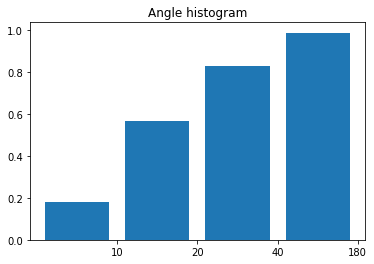

In [16]:
angle_hist /= float(test_data.shape[0])

x = np.arange(4)
plt.bar(x, height=angle_hist.squeeze())
plt.xticks(x+.5, ['10','20','40','180'])
plt.title('Angle histogram')

In [17]:
confusion_mat

array([[696.,   0.,   0.,   9.,   0.],
       [  0., 705.,   0.,   0.,   0.],
       [  0.,   2., 707.,   7.,   0.],
       [ 10.,   0.,   0., 682.,   3.],
       [  1.,   0.,   0.,   9., 704.]])

In [18]:
angle_hist

array([[0.18189533, 0.56746818, 0.83026874, 0.9884017 ]])

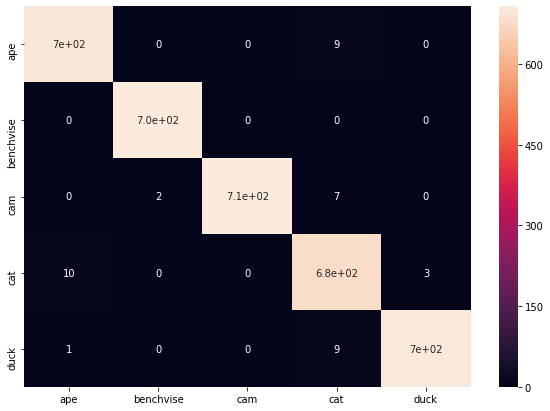

In [19]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(confusion_mat, index=[i for i in ["ape", "benchvise", "cam", "cat", "duck"]],
                  columns = [i for i in ["ape", "benchvise", "cam", "cat", "duck"]])

plt.figure(figsize = (10,7))

sn.heatmap(df_cm, annot=True)

In [0]:
tsne = TSNE(n_components=3).fit_transform(test_preds)

In [23]:
principalDf = pd.DataFrame(data = tsne
             , columns = ['component 1', 'component 2','component 3'])
principalDf

,component 1,component 2,component 3
0,-1.760973,-19.398466,-1.064760
1,-1.710892,-19.141542,-1.075349
2,-0.173100,-17.986162,-0.869264
3,-0.733863,-17.155741,-0.678628
4,-0.584595,-17.340008,-0.715276
...,...,...,...
3530,10.806551,4.015999,5.712891
3531,10.664361,3.771032,5.506666
3532,10.289153,3.720861,5.858943
3533,11.479074,4.927881,9.337688


In [26]:
labels = pd.DataFrame(data = test_class, columns = ['class'])
finalDf = pd.concat([principalDf,labels], axis = 1)
finalDf

,component 1,component 2,component 3,class
0,-1.760973,-19.398466,-1.064760,ape
1,-1.710892,-19.141542,-1.075349,ape
2,-0.173100,-17.986162,-0.869264,ape
3,-0.733863,-17.155741,-0.678628,ape
4,-0.584595,-17.340008,-0.715276,ape
...,...,...,...,...
3530,10.806551,4.015999,5.712891,duck
3531,10.664361,3.771032,5.506666,duck
3532,10.289153,3.720861,5.858943,duck
3533,11.479074,4.927881,9.337688,duck


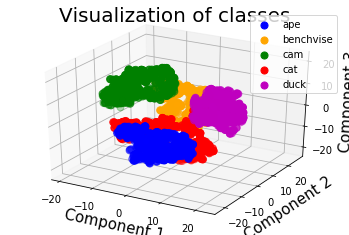

In [32]:
from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.set_xlabel('Component 1', fontsize = 15)
threedee.set_ylabel('Component 2', fontsize = 15)
threedee.set_zlabel('Component 3', fontsize = 15)
threedee.set_title('Visualization of classes', fontsize = 20)
targets = ['ape', 'benchvise', 'cam', 'cat', 'duck']
colors = ['b','orange','g', 'r', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    threedee.scatter(finalDf.loc[indicesToKeep, 'component 1']
               , finalDf.loc[indicesToKeep, 'component 2']
               , finalDf.loc[indicesToKeep, 'component 3']
               , c = color
               , s = 50)
threedee.legend(targets)
threedee.grid()
plt.show()

In [0]:
tsne = TSNE(n_components=2).fit_transform(test_preds)

In [35]:
principalDf2 = pd.DataFrame(data = tsne
             , columns = ['component 1', 'component 2'])
labels = pd.DataFrame(data = test_class, columns = ['class'])
finalDf2 = pd.concat([principalDf2,labels], axis = 1)
finalDf2

,component 1,component 2,class
0,-6.418536,55.818325,ape
1,-6.249324,55.539360,ape
2,-2.735542,55.427109,ape
3,-3.184245,54.069736,ape
4,-3.094740,54.366508,ape
...,...,...,...
3530,61.372299,-15.705027,duck
3531,60.940926,-15.922090,duck
3532,60.685425,-15.226236,duck
3533,65.909317,-12.490597,duck


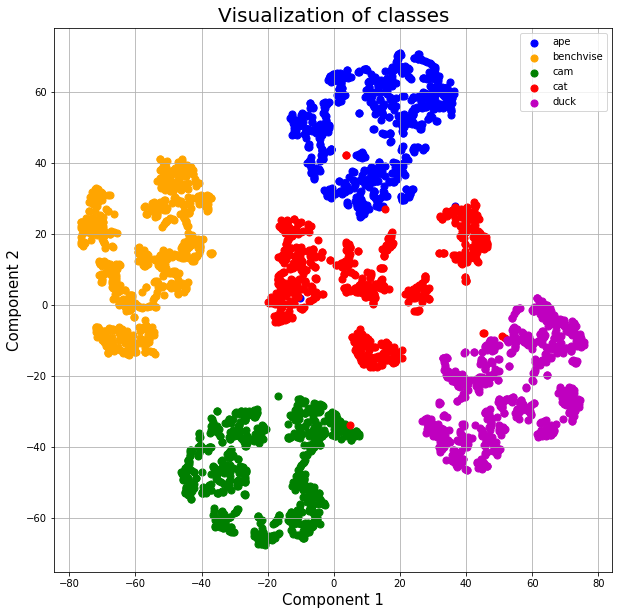

In [36]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Visualization of classes', fontsize = 20)
targets = ['ape', 'benchvise', 'cam', 'cat', 'duck']
colors = ['b','orange','g', 'r', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['class'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'component 1']
               , finalDf2.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()